In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("src/")

In [3]:
from datasets.emotion import EmotionDataset

dataset = EmotionDataset(
        text_processor='word2vec', 
        text_processor_filters=['lowercase', 'stopwordsfilter'],
        embedding_path='data/embeddings/word2vec/glove.6B.50d.txt',
        data_path='data/'
        )

### Dawid-Skene

In [4]:
import models.dawid_skene as ds

#### Prepare data

In [5]:
def prepare_input(dataset, missing_value=-1):
    data = {}
    for data_point in dataset:
        annotator = data_point['annotator']
        text = data_point['text']
        annotation = data_point['label'].item()
        
        if text not in data:
            data[text] = {}
        data[text][annotator] = [ annotation ]
        
    return data

In [6]:
data = prepare_input(dataset)

In [7]:
patients, observers, classes, counts, class_marginals, error_rates, patient_classes = ds.run(data)

num Patients: 100
Observers: ['A14WWG6NKBDWGP', 'A15L6WGIK3VU7N', 'A15MN5MDG4D7Q9', 'A1757CYJKBGLV2', 'A18WNE09USHJSG', 'A1A38NLITTAW6C', 'A1AVJRFM6L0RN8', 'A1DCEOFAUIDY58', 'A1LY3NJTYW9TFF', 'A1M0SEWUJYX9K0', 'A1P7VNMICQDNJY', 'A1Q5GERIWS0YJR', 'A1VYRD3HO2WDUN', 'A1XUMT8PKEPRR1', 'A1XUURRBT9RYFW', 'A1ZGDXSHUPEQD9', 'A2HNP1YL1IBFMU', 'A2KBTYNGUFRB9N', 'A2LRADB3KFT2AO', 'A2NCIFVGIZESDF', 'A2OY54JKHARPKS', 'A389Z7A60D4L8I', 'A39APWH62XBLR9', 'A3BD4NONKGONRM', 'A3EKIOVCNYJ9BJ', 'A3HA3UOKO2HTOK', 'A3MZF0DGGS6VEY', 'A3POYFULMTNW1H', 'A3TDUHEBFJ53NM', 'A8ERQT8X2HQPK', 'ADAGUJNWMEPT6', 'AHFO0JTF5WO8J', 'ALHOGP0VKKGM3', 'AMJY7CKRBEI2A', 'ARPJ3NYNHTA31', 'ARQ4J4TLTPBNC', 'AS51Z6DBWM9JM', 'AZ209ZYWRSIUG']
Classes: [0, 1, 2]
Iter	log-likelihood	delta-CM	delta-ER
1 	 -231.28421133900432
2 	 -211.19067782077374 	0.047932	19.735631
3 	 -203.78365725024452 	0.026566	10.591304
4 	 -200.16940735219035 	0.013354	5.952053
5 	 -198.7844299254273 	0.009748	2.638566
6 	 -197.8619410765871 	0.007688	1.811625

#### Visualize

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_error_matrices(error_rates, observers, class_marginals):
    nrows, ncols = int(math.ceil(len(observers)/3)), 3
    f, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*5))
    for i, obs in enumerate(observers):
        error_rate = error_rates[i]
        incidence_of_error_rate = class_marginals * error_rate
        
        sns.heatmap(error_rate, vmin=0, vmax=1, annot=True, cbar=False, ax=axs.flat[i])
        axs.flat[i].set_title(f'Error rate \n {obs}')
        axs.flat[i].set_xlabel('Observed label')
        axs.flat[i].set_ylabel('Latent truth')
    plt.show(f)

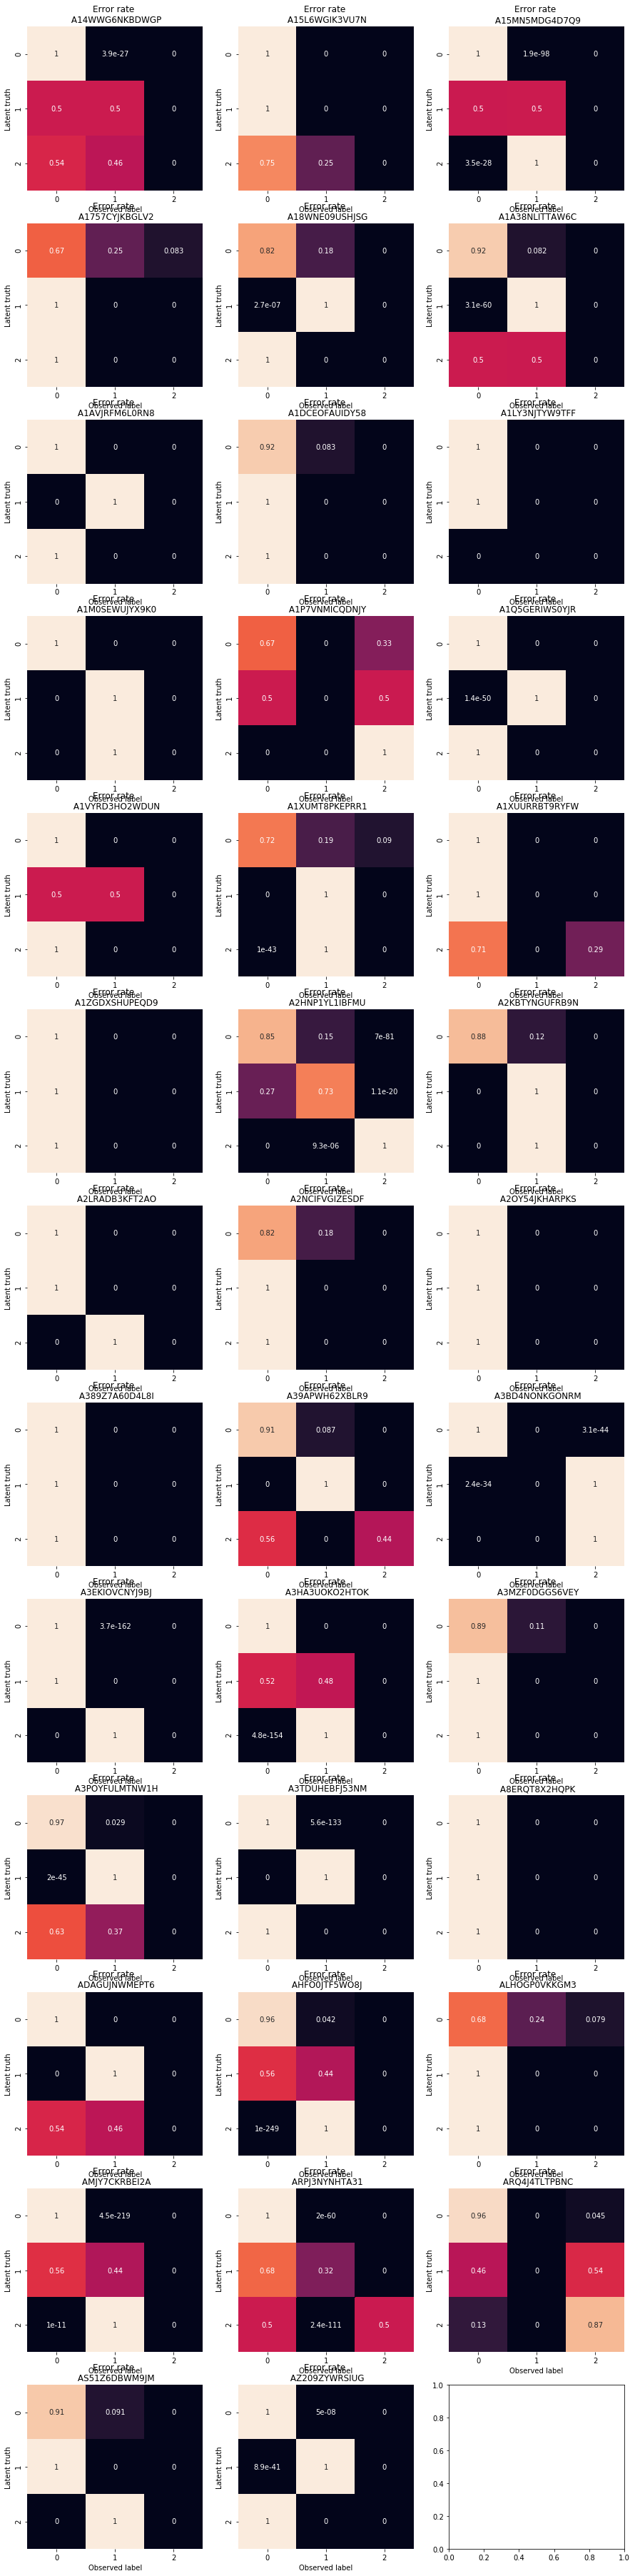

In [9]:
plot_error_matrices(error_rates, observers, class_marginals)